# Nama : Indah Rahma Abdillah

# NPM  : 23083010002

# Kelas: A083 - Analisis Data Eksploratif

## Import & Read Data

In [23]:
import pandas as pd

df = pd.read_csv('D:\Semester 3\Analisis Data Eksploratif\Tugas\Tugas 4 EDA\data stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Missing Value

### Mencari Missing Value

In [25]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


isnull().sum() menghitung jumlah missing value pada setiap kolom. Langkah pertama adalah memeriksa apakah ada nilai yang hilang.

In [26]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Hasilnya, didapatkan 201 missing value pada variabel bmi.

### Mengatasi Missing Value

Karena kita akan mengatasi missing value pada variabel BMI, kita harus menampilkan distribusinya terlebih dahulu untuk mengetahui pendekatan yang tepat untuk mengatasinya.

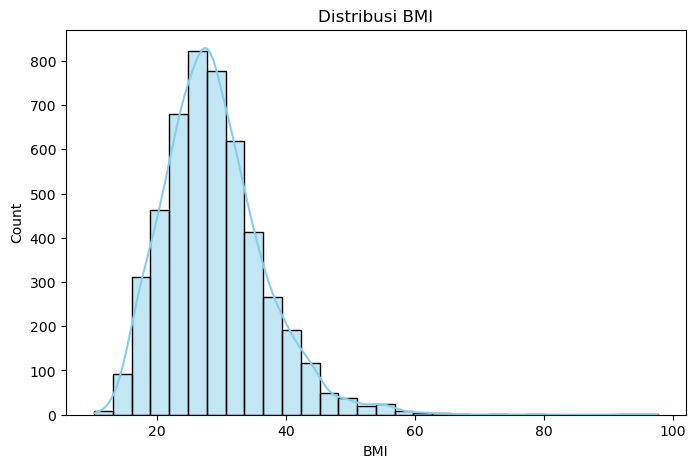

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

Dari distribusi BMI yang terlihat pada gambar tersebut, distribusinya tampak miring dengan beberapa puncak yang menonjol, terutama di sekitar nilai 25 dan 30. Ada juga beberapa nilai ekstrem di ujung kanan (di atas 40), yang mengindikasikan adanya outlier. Karena distribusi BMI tidak sepenuhnya normal dan tampak miring dengan outlier di bagian kanan, metode median akan lebih tepat dibandingkan mean. Median tidak dipengaruhi oleh outlier seperti mean, sehingga lebih representatif.

In [28]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### Dummy Variabel

Karena sudah tidak ada missing value, kita lanjutkan dengan dummy variable. pd.get_dummies() mengubah kolom kategorikal menjadi variabel dummy.

In [29]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


## Outlier

### Mencari Outlier

Menggunakan boxplot untuk mendeteksi outlier pada kolom numerik seperti age, avg_glucose_level, dan bmi.

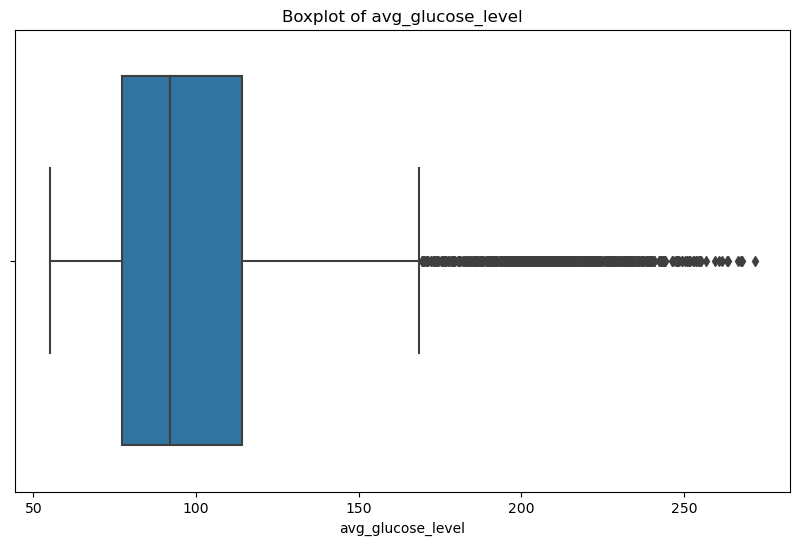

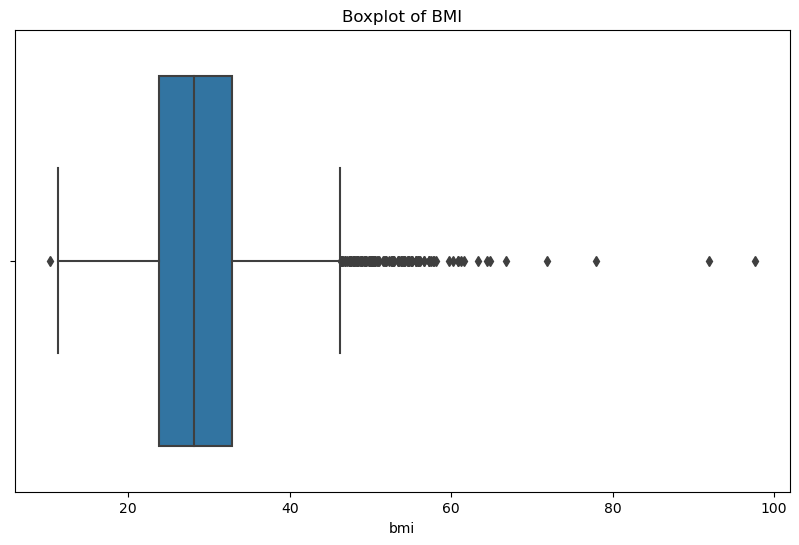

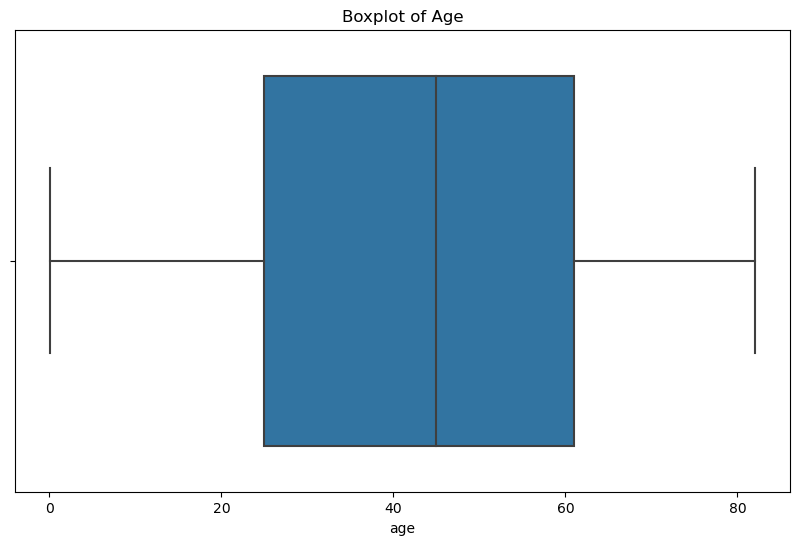

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Boxplot of avg_glucose_level')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()

Hasilnya, terdapat outlier pada variabel avg_glucose_level dan bmi

Menggunakan metode IQR (Interquartile Range) untuk mendeteksi outlier pada kolom numerik seperti age, avg_glucose_level, dan bmi. IQR digunakan untuk mendeteksi outlier dengan menghitung rentang antara Q1 dan Q3.

In [31]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outliers_glucose = detect_outliers('avg_glucose_level')
outliers_bmi = detect_outliers('bmi')

print(f"Outliers in avg_glucose_level:\n{outliers_glucose}")
print(f"Outliers in bmi:\n{outliers_bmi}")

Outliers in avg_glucose_level:
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5061  38009    Male  41.0             0              0          Yes   
5062  11184  Female  82.0             0              0          Yes   
5063  68967    Male  39.0             0              0          Yes   
5064  66684    Male  70.0             0              0          Yes   
5076  39935  Female  34.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban  

### Mengatasi Outlier

Untuk mengatasi outlier pada variabel avg_glucose_level dan bmi, bisa menggunakan teknik winsorizing, yaitu membatasi nilai ekstrem pada batas tertentu sehingga mereka tidak lagi dianggap outlier. Winsorizing memotong nilai-nilai yang terlalu rendah atau terlalu tinggi berdasarkan persentil tertentu.

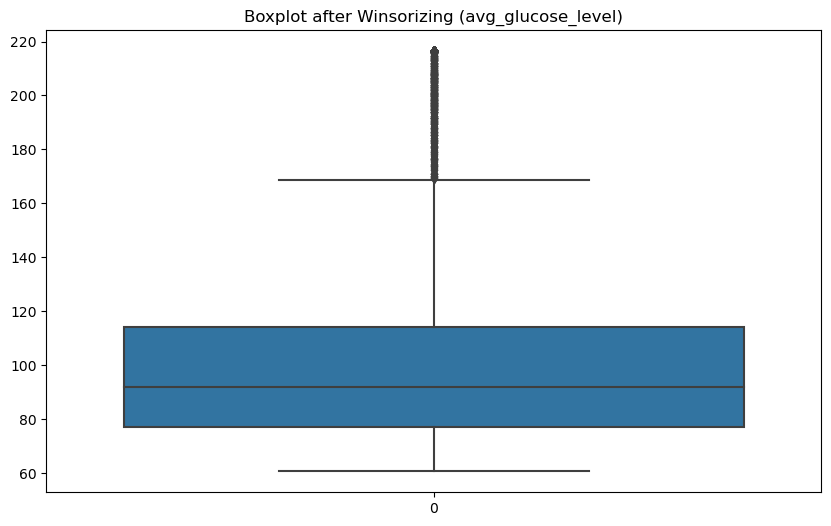

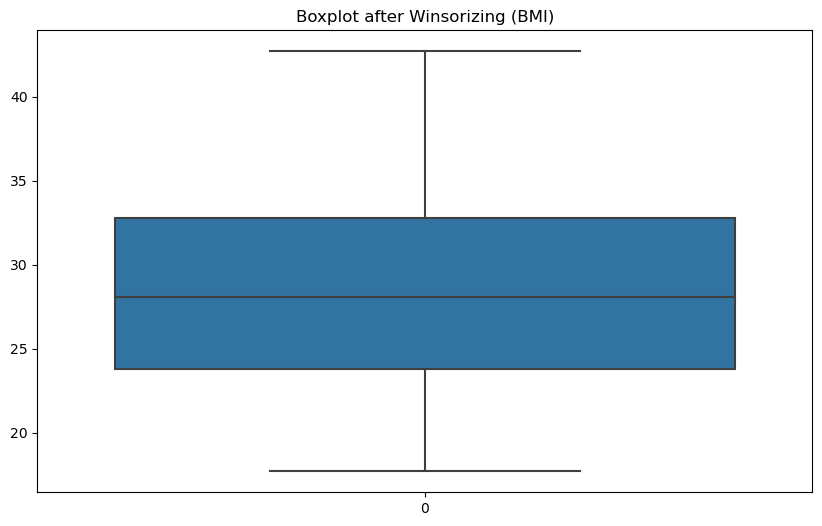

In [32]:
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt

df['avg_glucose_level'] = winsorize(df['avg_glucose_level'], limits=[0.05, 0.05])
df['bmi'] = winsorize(df['bmi'], limits=[0.05, 0.05])

plt.figure(figsize=(10,6))
sns.boxplot(df['avg_glucose_level'])
plt.title('Boxplot after Winsorizing (avg_glucose_level)')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(df['bmi'])
plt.title('Boxplot after Winsorizing (BMI)')
plt.show()

Setelah winsorizing, boxplot menunjukkan distribusi data yang lebih seimbang, dengan lebih sedikit atau tanpa titik-titik yang keluar dari whisker (tanda outlier).

### Kategorisasi Variabel

1. Kategorisasi Age (Usia)

0-18: Children (Anak-anak)

19-35: Young Adult (Dewasa Muda)

36-50: Adult (Dewasa)

51-65: Middle Aged (Lansia Muda)

di atas 65: Senior (Lansia)


2. Kategorisasi BMI

BMI < 18.5: Underweight

18.5 <= BMI < 24.9: Normal weight

25 <= BMI < 29.9: Overweight

BMI >= 30: Obese


3. Kategorisasi avg_glucose_level (Rata-rata Kadar Glukosa)

avg_glucose_level < 70: Low

70 <= avg_glucose_level < 140: Normal

140 <= avg_glucose_level < 200: Prediabetes

avg_glucose_level >= 200: Diabetes

In [33]:
bins_age = [0, 18, 35, 50, 65, 120]
labels_age = ['Children', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
df['age_category'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)

bins_bmi = [0, 18.5, 24.9, 29.9, 100]
labels_bmi = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins_bmi, labels=labels_bmi, right=False)

bins_glucose = [0, 70, 140, 200, 300]
labels_glucose = ['Low', 'Normal', 'Prediabetes', 'Diabetes']
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=bins_glucose, labels=labels_glucose, right=False)

print("Kategorisasi Usia (Age):")
print(df[['age', 'age_category']].head())
print("\nKategorisasi BMI:")
print(df[['bmi', 'bmi_category']].head())
print("\nKategorisasi Avg Glucose Level:")
print(df[['avg_glucose_level', 'glucose_category']].head())

Kategorisasi Usia (Age):
    age age_category
0  67.0       Senior
1  61.0  Middle Aged
2  80.0       Senior
3  49.0        Adult
4  79.0       Senior

Kategorisasi BMI:
    bmi   bmi_category
0  36.6          Obese
1  28.1     Overweight
2  32.5          Obese
3  34.4          Obese
4  24.0  Normal weight

Kategorisasi Avg Glucose Level:
   avg_glucose_level glucose_category
0             216.38         Diabetes
1             202.21         Diabetes
2             105.92           Normal
3             171.23      Prediabetes
4             174.12      Prediabetes


1. Age dibagi menjadi kategori berdasarkan rentang usia.
2. BMI dibagi menjadi kategori berdasarkan standar BMI.
3. Avg_glucose_level dikategorikan sesuai dengan standar  untuk kadar glukosa darah.

## Transformasi Data

### Sebelum Transformasi

Sebelum melakukan transformasi, kita visualisasikan data numerik untuk age, bmi, dan avg_glucose_level dengan menggunakan histogram.

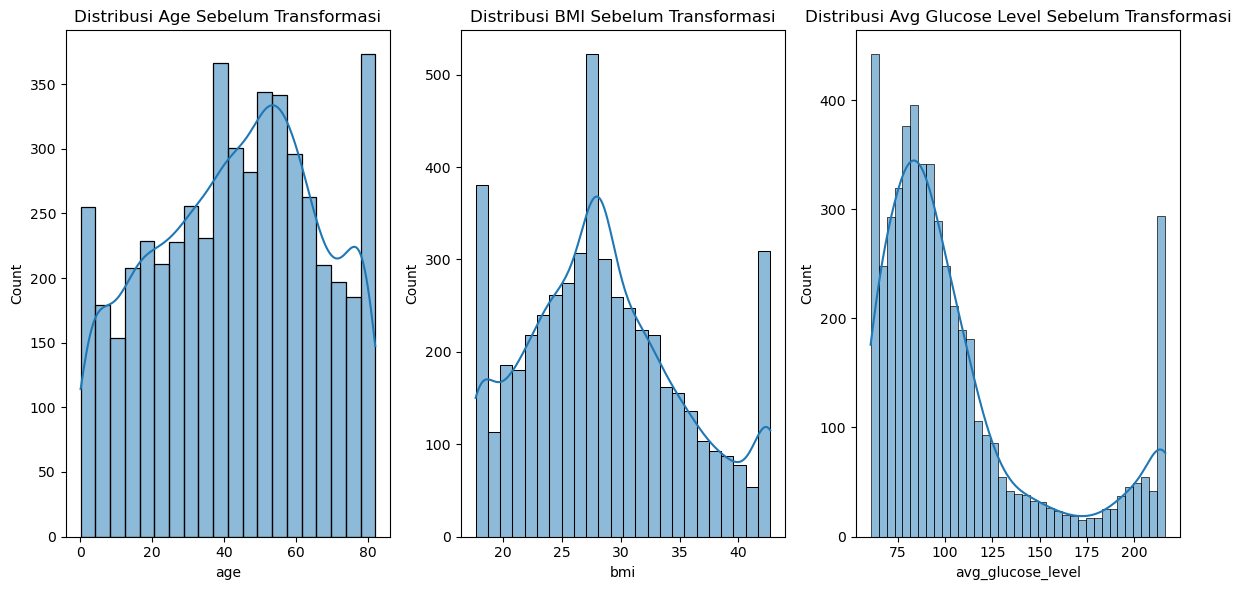

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Age Sebelum Transformasi')

plt.subplot(1, 3, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('Distribusi BMI Sebelum Transformasi')

plt.subplot(1, 3, 3)
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title('Distribusi Avg Glucose Level Sebelum Transformasi')

plt.tight_layout()
plt.show()

### Sesudah Transformasi

Kita akan menggunakan StandardScaler dari sklearn untuk mentransformasikan variabel numerik menjadi distribusi standar (mean = 0, standard deviation = 1).

In [35]:
scaler = StandardScaler()

df[['age_scaled', 'bmi_scaled', 'avg_glucose_level_scaled']] = scaler.fit_transform(df[['age', 'bmi', 'avg_glucose_level']])

print(df[['age', 'age_scaled', 'bmi', 'bmi_scaled', 'avg_glucose_level', 'avg_glucose_level_scaled']].head())

    age  age_scaled   bmi  bmi_scaled  avg_glucose_level  \
0  67.0    1.051434  36.6    1.188594             216.38   
1  61.0    0.786070  28.1   -0.080761             202.21   
2  80.0    1.626390  32.5    0.576317             105.92   
3  49.0    0.255342  34.4    0.860055             171.23   
4  79.0    1.582163  24.0   -0.693039             174.12   

   avg_glucose_level_scaled  
0                  2.577516  
1                  2.248059  
2                  0.009288  
3                  1.527765  
4                  1.594958  


Setelah mentransformasikan data, kita bisa memvisualisasikan distribusi yang sudah diubah menggunakan histogram untuk membandingkan hasil transformasi.

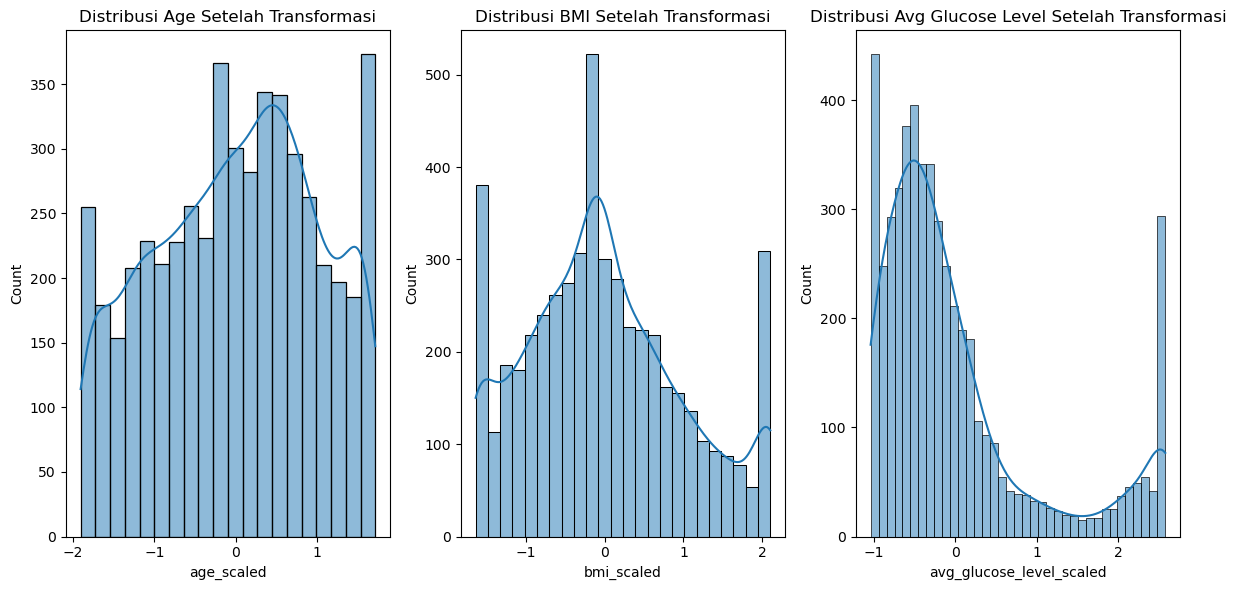

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['age_scaled'], kde=True)
plt.title('Distribusi Age Setelah Transformasi')

plt.subplot(1, 3, 2)
sns.histplot(df['bmi_scaled'], kde=True)
plt.title('Distribusi BMI Setelah Transformasi')

plt.subplot(1, 3, 3)
sns.histplot(df['avg_glucose_level_scaled'], kde=True)
plt.title('Distribusi Avg Glucose Level Setelah Transformasi')

plt.tight_layout()
plt.show()